In [ ]:
### Melchizedek Ackah-Blay

December 10, 2024

**Text Classification N

*importing libraries*

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

*loading dataset*

In [32]:
df = pd.read_csv(r'/Users/melki/Desktop/Corona_NLP_train.csv', encoding = 'latin-1')

*showing sample data*

In [33]:
df.sample(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
40515,44314,89266,NaN,13-04-2020,"Consumer behavior post coronavirus, 5 actions ...",Neutral
29132,32931,77883,Bangladesh,05-04-2020,"spray it\r\r\nIts a 3 panel comic script , sho...",Negative
36740,40539,85491,"England, United Kingdom",10-04-2020,If youÂre an automotive retailer that is unsu...,Negative
13227,17026,61978,"Kansas, USA",21-03-2020,WOH NEVER WORRY AGAIN But make sure the cat do...,Extremely Positive
5507,9306,54258,"California, USA",19-03-2020,@AlyssaSelogie United States:\r\r\nOctober 201...,Negative


*showing shape of data*

In [35]:
df.shape

(41157, 6)

*showing summary information*

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


*showing summary statistics*

In [37]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


*looking for null values*

In [38]:
df.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

*analyzing tweets by location*

In [46]:
location_data = df['Location'].value_counts().sort_values(ascending = False)
pd.DataFrame(location_data.head(10))

,count
Location,
London,540
United States,528
"London, England",520
"New York, NY",395
"Washington, DC",373
United Kingdom,337
"Los Angeles, CA",281
India,268
UK,232


*top 5 locations visualized*

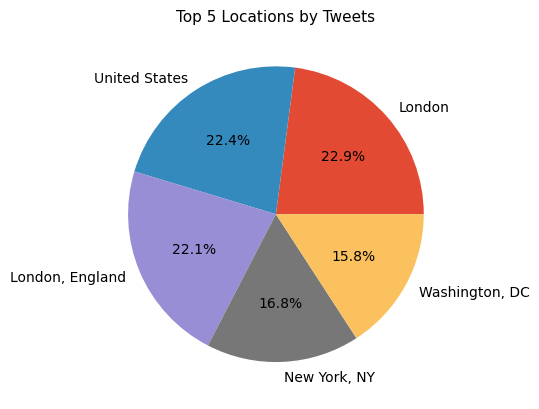

In [59]:
plt.title('Top 5 Locations by Tweets', fontsize = 11)
location_data.head(5).plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.show()

*analyzing sentiment values*

In [49]:
sentiment_data = df['sentiment'].value_counts(ascending = False)
pd.DataFrame(sentiment_data)

,count
sentiment,
Positive,11422
Negative,9917
Neutral,7713
Extremely Positive,6624
Extremely Negative,5481


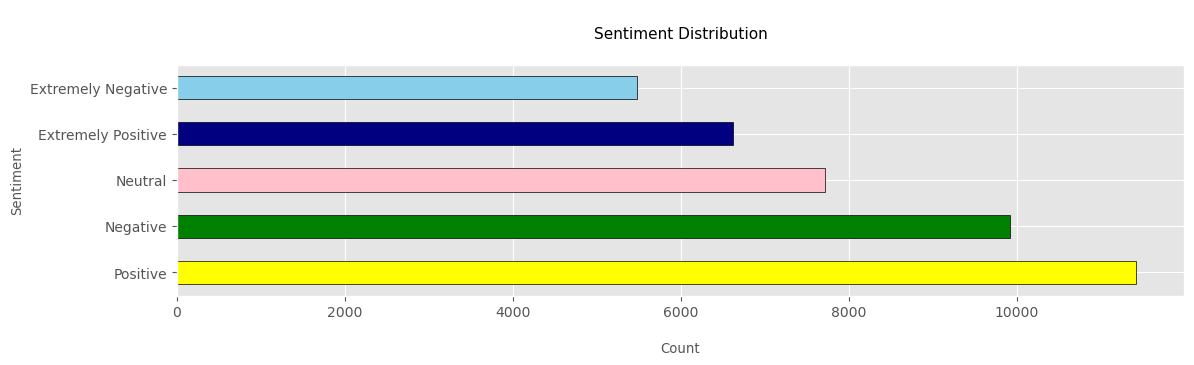

In [54]:
plt.figure(figsize = (13, 3))
sentiment_data.plot(kind = 'barh', color = ['yellow', 'green','pink', 'navy', 'skyblue'], edgecolor = 'black')
plt.title('\nSentiment Distribution\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('Sentiment', fontsize = 9.5)
plt.show()

*dropping columns not neeeded for machine learning*

In [62]:
df.drop(columns = ['username','screenname', 'location', 'tweetat'], inplace = True)

*original tweets analysis*

In [64]:
blanks = []
for i in df['originaltweet']:
    if i.isspace() == True:
        blanks.append(i)

In [65]:
blanks

[]

*splitting x and y data*

In [66]:
x = df['originaltweet']
y = df['sentiment']

*splitting data into train and test*

In [67]:
from sklearn.model_selection import train_test_split as t
x_train, x_test, y_train, y_test = t(x, y, test_size = 0.2, random_state = 1)

In [69]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
textclf = Pipeline(
    [
        ('tfidf', TfidfVectorizer()),
        ('clf', LinearSVC())
    ]
)

In [71]:
textclf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

*making predictions and evaluating model*

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
y_pred = textclf.predict(x_test)

In [73]:
accuracy_score(y_test, y_pred)

0.5699708454810496

In [74]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 711,    6,  298,   31,   41],
       [   4,  891,   50,   42,  344],
       [ 378,   53,  930,  267,  376],
       [  22,   30,  208, 1003,  291],
       [  60,  427,  353,  259, 1157]])

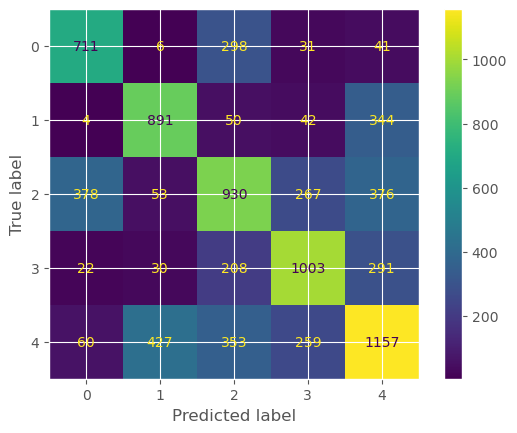

In [78]:
cm_visualized = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_visualized.plot()
plt.show()

*experimenting with the model*

In [79]:
new_tweet = [('it is a warm, sunny, summer day')]
textclf.predict(new_tweet)

array(['Positive'], dtype=object)

In [80]:
new_tweet = [('the weather was nice but could have been much better')]
textclf.predict(new_tweet)

array(['Extremely Positive'], dtype=object)

In [82]:
new_tweet = [('it rained all day, i hated it!')]
textclf.predict(new_tweet)

array(['Extremely Negative'], dtype=object)